# Simple Linear Regression

In this notebook, we study a simple linear regression. First, we construct a linear predictor function without scikit learn and then we use scikit learn. We will see these two results are the same.

The example is coming from 
<a href="https://en.wikipedia.org/wiki/Logistic_regression">Logistic regression in Wikipedia</a>.

The table indicates the number of hours twenty students spent studying for an exam and whether or not they passed (1) or faild (0).

### 1. Without Scikit Learn

In [1]:
import pandas as pd
df = pd.DataFrame({
    'Hours': [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 4.0, 4.25, 4.5, 4.75, 5.0, 5.5],
    'Result': [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]})
df

,Hours,Result
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


The following is the graph.

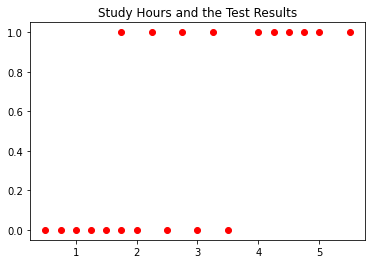

In [2]:
import matplotlib.pyplot as plt
plt.plot(df['Hours'], df['Result'], 'ro')
plt.title("Study Hours and the Test Results")
plt.show()

We will construct a linear predictor function y = b_1 * x + b_0 using the method of least squares.
First, we compute b_1. We do not want to modify the original data frame. So we will use a `copy`.

In [3]:
def copying(data):
    return data.copy()

In [4]:
def coefficient(data):
    data['numerator'] = (data['Hours']-df['Hours'].mean())*(data['Result']-df['Result'].mean())
    data['denominator'] = ((data['Hours']-df['Hours'].mean())**2)
    return data['numerator'].sum()/data['denominator'].sum()

In [5]:
coef = df.pipe(copying).pipe(coefficient)
print(coef)

0.23459561219317931


We compute b_0.

In [6]:
def intercept(beta=0.2346):
    return df['Result'].mean()-(beta*df['Hours'].mean())

In [7]:
inter=intercept(beta=0.2346)
print(inter)

-0.15394750000000001


So what is the linear predictor function?

In [8]:
print(f"The linear predictor function is y = {coef}*x + ({inter}).")

The linear predictor function is y = 0.23459561219317931*x + (-0.15394750000000001).


The following is the graph.

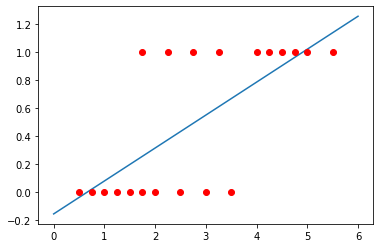

In [9]:
import numpy as np

x = np.linspace(0,6,10)
y = 0.2346 * x - 0.1539 

plt.plot(x,y)
plt.plot(df['Hours'], df['Result'], 'ro')
plt.show()

### 2. With Scikit Learn

In [10]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [12]:
print(regressor.coef_)

[0.23459561]


In [13]:
print(regressor.intercept_)

-0.15393526898848708


The data type of regressor.coef_ is `numpy.ndarray`. We can change it into Python float as follows.

In [14]:
print(type(regressor.coef_), type(regressor.coef_.item()))

<class 'numpy.ndarray'> <class 'float'>


So what is the linear predictor function?

In [15]:
print(f"The linear predictor function is y = {regressor.coef_.item()}*x + ({regressor.intercept_}).")

The linear predictor function is y = 0.2345956121931792*x + (-0.15393526898848708).


Let's draw the graph. We devide the interval [0, 6] into the nine equal peices for the x-axis of the graph. 

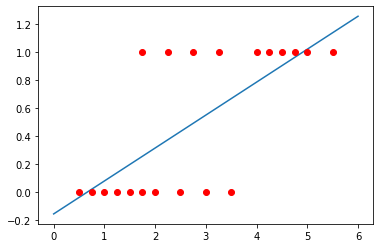

In [16]:
import numpy as np

x_new = np.linspace(0,6,10)
y_new = regressor.predict(x_new.reshape(10, 1))

plt.plot(x_new, y_new)
plt.plot(df['Hours'], df['Result'], 'ro')
plt.show()

In the above, we reshaped the ndarray. We can add a column by `np.newaxis` as follows.

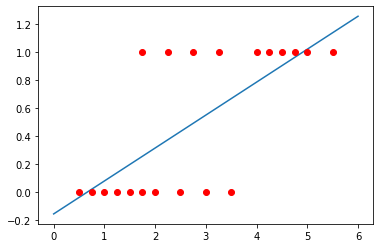

In [17]:
import numpy as np

x_new = np.linspace(0,6,10)
y_new = regressor.predict(x_new[:, np.newaxis])

plt.plot(x_new, y_new)
plt.plot(df['Hours'], df['Result'], 'ro')
plt.show()

Why do we need to reshape the ndarray? Most scikit-learn transformers and estimators expect to be fed their predictive X data in two-dimensional form. The target variable, y is expected to be one-dimensional
according to <a href="https://towardsdatascience.com/get-into-shape-14637fe1cd32">Get into shape!</a>.

In [18]:
x = np.linspace(0,6,10)
print(x)
print(type(x))
print(x.shape)

[0.         0.66666667 1.33333333 2.         2.66666667 3.33333333
 4.         4.66666667 5.33333333 6.        ]
<class 'numpy.ndarray'>
(10,)


We convert x into two-dimensional data by `reshape` or `np.newaxis`.

In [19]:
x = np.linspace(0,6,10)
x_re=x.reshape(10, 1)
print(x_re)
print(type(x_re))
print(x_re.shape)

[[0.        ]
 [0.66666667]
 [1.33333333]
 [2.        ]
 [2.66666667]
 [3.33333333]
 [4.        ]
 [4.66666667]
 [5.33333333]
 [6.        ]]
<class 'numpy.ndarray'>
(10, 1)


`reshape(10, 1)` means that we want 10 by 1 ndarray by reshaping the original data. We can use -1 instead of 10 to indicate any number of rows. -1 makes the programming more flexible.

In [20]:
x = np.linspace(0,6,10)
x_re=x.reshape(-1, 1)
print(x_re)
print(type(x_re))
print(x_re.shape)

[[0.        ]
 [0.66666667]
 [1.33333333]
 [2.        ]
 [2.66666667]
 [3.33333333]
 [4.        ]
 [4.66666667]
 [5.33333333]
 [6.        ]]
<class 'numpy.ndarray'>
(10, 1)


Or we can add a column by `np.newaxis`.

In [21]:
print(x[:, np.newaxis])
print(type(x[:, np.newaxis]))
print(x[:, np.newaxis].shape)

[[0.        ]
 [0.66666667]
 [1.33333333]
 [2.        ]
 [2.66666667]
 [3.33333333]
 [4.        ]
 [4.66666667]
 [5.33333333]
 [6.        ]]
<class 'numpy.ndarray'>
(10, 1)
